In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns

def get_mean_rel_err(predict, y):
    result = 0
    for i in range(predict.size):
        result = result + abs(predict[i] - y.iloc[i])/y.iloc[i]
    result = result / predict.size
    return result.values[0]

# Загрузка данных

In [8]:
data = pd.read_excel('data.xls')

numeric_features = ['pBub', 'initPres_pBub', 'temp_init', 'prBottomholePressure', 'well_dist']
objective = ['cum_prodaction']
X = data.drop(['case_num', 'cum_prodaction', 'Xsize', 'Ysize'], axis = 1)
y = data[objective]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(120, 5) (40, 5) (40, 5)
(120, 1) (40, 1) (40, 1)


# Анализ данных

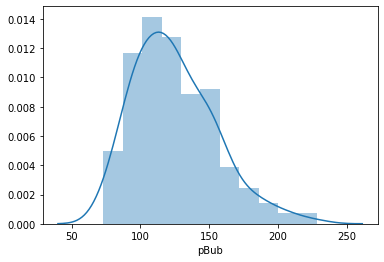

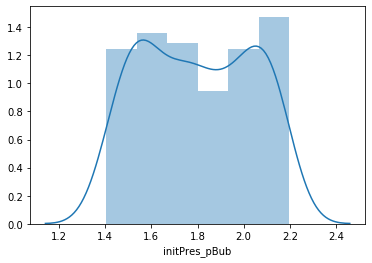

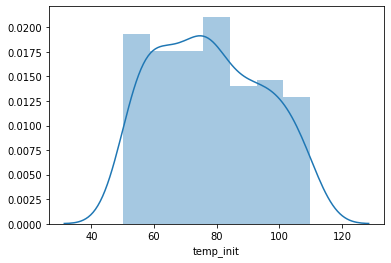

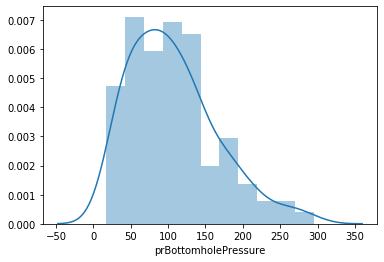

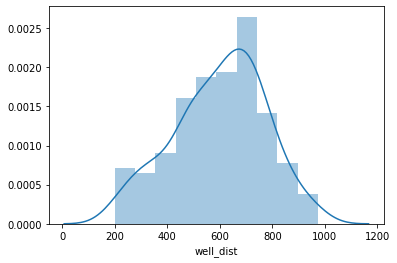

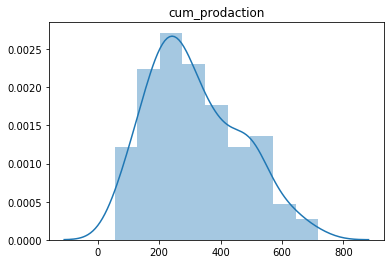

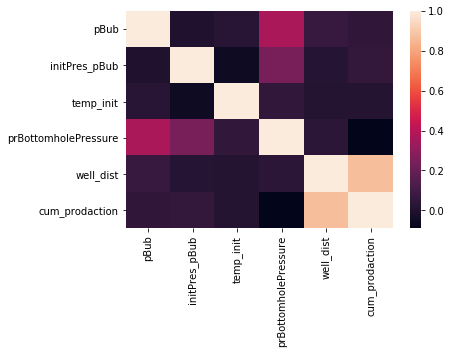

In [10]:
for i in range(0, len(numeric_features)):
    sns.distplot(X[numeric_features[i]])
    plt.show()

sns.distplot(y)
plt.title('cum_prodaction')
plt.show()   

corr_matrix = pd.concat([X, y], axis = 1).corr()
sns.heatmap(corr_matrix)

# Скалирование 

In [3]:
Xscaler = MinMaxScaler()  # (x - x.min()) / (x.max() - x.min())
yscaler = MinMaxScaler()  # (x - x.min()) / (x.max() - x.min())

train_indeces = X_train.index
test_indeces = X_test.index
val_indeces = X_val.index

df_tmp = pd.DataFrame(Xscaler.fit_transform(X_train[numeric_features]), columns = numeric_features, index = train_indeces)
X_train_scal = pd.concat([df_tmp, X_train.drop(numeric_features, axis = 1)], axis = 1)
y_train_scal = pd.DataFrame(yscaler.fit_transform(y_train), columns = objective, index = train_indeces)

df_tmp_test = pd.DataFrame(Xscaler.transform(X_test[numeric_features]), columns = numeric_features, index = test_indeces)
X_test_scal = pd.concat([df_tmp_test, X_test.drop(numeric_features, axis = 1)], axis = 1)
y_test_scal = pd.DataFrame(yscaler.transform(y_test), columns = objective, index = test_indeces)

df_tmp_val = pd.DataFrame(Xscaler.transform(X_val[numeric_features]), columns = numeric_features, index = val_indeces)
X_val_scal = pd.concat([df_tmp_val, X_val.drop(numeric_features, axis = 1)], axis = 1)
y_val_scal = pd.DataFrame(yscaler.transform(y_val), columns = objective, index = val_indeces)

print('Scaled training set of features:')
display(X_train_scal.head())
print('Scaled training objective function:')
display(y_train_scal.head())

Scaled training set of features:


,pBub,initPres_pBub,temp_init,prBottomholePressure,well_dist
63,0.112030,0.768145,0.850576,0.395448,0.521927
52,0.364361,0.176602,0.305566,0.210014,0.089054
41,0.385377,0.575306,0.357246,0.220105,0.666966
133,0.710723,0.711100,0.313558,0.255737,0.631491
119,0.105182,0.426715,0.003168,0.052820,0.538942


Scaled training objective function:


,cum_prodaction
63,0.441806
52,0.085132
41,0.336933
133,0.641972
119,0.181330


# Linear regression

In [5]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_scal, y_train_scal)

predict_lin_reg_val = model_lin_reg.predict(X_val_scal)
predict_lin_reg_test = model_lin_reg.predict(X_test_scal)

mae_val = mean_absolute_error(predict_lin_reg_val, y_val_scal)      # Mean Absolute Error
mae_test = mean_absolute_error(predict_lin_reg_test, y_test_scal)   # Mean Absolute Error

mre_val = get_mean_rel_err(predict_lin_reg_val, y_val_scal)       # Mean Relative Error 
mre_test = get_mean_rel_err(predict_lin_reg_test, y_test_scal)    # Mean Relative Error 

print('For Linear Regression MAE on validation set:', mae_val)   
print('For Linear Regression MAE on test set:', mae_test)

print('For Linear Regression MRE on validation set:', mre_val)
print('For Linear Regression MRE on test set:', mre_test)

For Linear Regression MAE on validation set: 0.07257940697708867
For Linear Regression MAE on test set: 0.0991356124326913
For Linear Regression MRE on validation set: 0.36747122105370833
For Linear Regression MRE on test set: 0.295085894095087


# Lasso regression

In [6]:
model_lasso_reg = Lasso(alpha = 0.01)
#model_lasso_reg = Lasso(alpha = 0.1)
model_lasso_reg.fit(X_train_scal, y_train_scal)

predict_lasso_reg_val = model_lasso_reg.predict(X_val_scal)
predict_lasso_reg_test = model_lasso_reg.predict(X_test_scal)

mae_val = mean_absolute_error(predict_lasso_reg_val, y_val_scal)      # Mean Absolute Error
mae_test = mean_absolute_error(predict_lasso_reg_test, y_test_scal)   # Mean Absolute Error

mre_val = get_mean_rel_err(predict_lasso_reg_val, y_val_scal)       # Mean Relative Error 
mre_test = get_mean_rel_err(predict_lasso_reg_test, y_test_scal)    # Mean Relative Error 

print('For Lasso regression MAE on validation set:', mae_val)   
print('For Lasso regression MAE on test set:', mae_test)

print('For Lasso regression MRE on validation set:', mre_val)
print('For Lasso regression MRE on test set:', mre_test)

For Lasso regression MAE on validation set: 0.07294093960673817
For Lasso regression MAE on test set: 0.11170743936399159
For Lasso regression MRE on validation set: 0.22927286153961024
For Lasso regression MRE on test set: 0.2845045486118495


# XGBoost

In [11]:
model_xgboost = XGBRegressor(objective = 'reg:squarederror')
model_xgboost.fit(X_train_scal, y_train_scal)

predict_xgboost_val = model_xgboost.predict(X_val_scal)
predict_xgboost_test = model_xgboost.predict(X_test_scal)

mae_val = mean_absolute_error(predict_xgboost_val, y_val_scal)      # Mean Absolute Error
mae_test = mean_absolute_error(predict_xgboost_test, y_test_scal)   # Mean Absolute Error

mre_val = get_mean_rel_err(predict_xgboost_val, y_val_scal)       # Mean Relative Error 
mre_test = get_mean_rel_err(predict_xgboost_test, y_test_scal)    # Mean Relative Error 


print('For XGBRegressor MAE on validation set:', mae_val)   
print('For XGBRegressor MAE on test set:', mae_test)

print('For XGBRegressor MRE on validation set:', mre_val)
print('For XGBRegressor MRE on test set:', mre_test)

For XGBRegressor MAE on validation set: 0.07514958533562513
For XGBRegressor MAE on test set: 0.08872752969367903
For XGBRegressor MRE on validation set: 0.2570773520478026
For XGBRegressor MRE on test set: 0.2686199714251569


# SVR

In [12]:
model_svr = SVR(kernel='linear')
model_svr.fit(X_train_scal, y_train_scal.values.ravel())

predict_svr_val = model_svr.predict(X_val_scal)
predict_svr_test = model_svr.predict(X_test_scal)

mae_val = mean_absolute_error(predict_svr_val, y_val_scal)      # Mean Absolute Error
mae_test = mean_absolute_error(predict_svr_test, y_test_scal)   # Mean Absolute Error

mre_val = get_mean_rel_err(predict_svr_val, y_val_scal)       # Mean Relative Error 
mre_test = get_mean_rel_err(predict_svr_test, y_test_scal)    # Mean Relative Error 

print('For SVR MAE on validation set:', mae_val)   
print('For SVR MAE on test set:', mae_test)

print('For SVR MRE on validation set:', mre_val)
print('For SVR MRE on test set:', mre_test)

For SVR MAE on validation set: 0.08013119336261532
For SVR MAE on test set: 0.10000927652900134
For SVR MRE on validation set: 0.4832470412635623
For SVR MRE on test set: 0.30858631865615377


# Анализ результатов

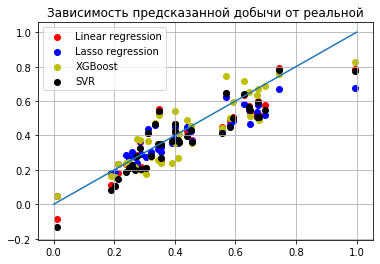

In [13]:
a = [0, 1]
plt.plot(a, a)

plt.scatter(y_val_scal, predict_lin_reg_val,color='red', label='Linear regression')
plt.scatter(y_val_scal, predict_lasso_reg_val,color='b', label='Lasso regression')
plt.scatter(y_val_scal, predict_xgboost_val,color='y', label='XGBoost')
plt.scatter(y_val_scal, predict_svr_val,color='k', label='SVR')
plt.title('Зависимость предсказанной добычи от реальной')
plt.legend()
plt.grid()
plt.show()

In [14]:
kf = KFold(n_splits = 5)

scoring = 'r2'

scores_lin_reg = cross_val_score(model_lin_reg, X_train_scal, y_train_scal, cv = kf, scoring = scoring)
scores_lasso = cross_val_score(model_lasso_reg, X_train_scal, y_train_scal, cv = kf, scoring = scoring)
#print(scores_lasso)
scores_xgboost = cross_val_score(model_xgboost, X_train_scal, y_train_scal, cv = kf, scoring = scoring)
scores_svr = cross_val_score(model_svr, X_train_scal, y_train_scal.values.ravel(), cv = kf, scoring = scoring)

tot_scores = {}
tot_scores['Linear_reg'] = scores_lin_reg.mean()
tot_scores['Lasso_reg'] = scores_lasso.mean()
tot_scores['XGBRegressor'] = scores_xgboost.mean()
tot_scores['SVR'] = scores_svr.mean()

print(tot_scores)

{'Linear_reg': 0.7387404964868622, 'Lasso_reg': 0.7106636920343535, 'XGBRegressor': 0.773769874407143, 'SVR': 0.7332755023313089}


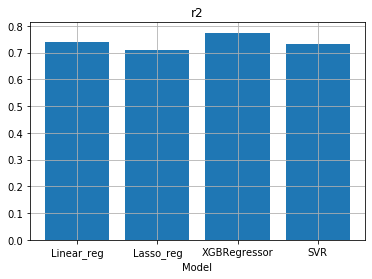

In [15]:
plt.xlabel('Model')
plt.title(scoring)

values = list(tot_scores.values())
keys = list(tot_scores.keys())
plt.bar(range(len(tot_scores)), values, tick_label=keys)

plt.grid()
plt.show()